In [79]:
import numpy as np

def mask_hole_positions(HOLE_PITCH, MASK_OFFSET_X, MASK_OFFSET_Y):
    x_positions = np.arange(-1.5*HOLE_PITCH+MASK_OFFSET_X,
                            1.6*HOLE_PITCH+MASK_OFFSET_X,
                            HOLE_PITCH)
    y_positions = np.arange(1.5*HOLE_PITCH+MASK_OFFSET_Y,
                            -1.6*HOLE_PITCH+MASK_OFFSET_Y,
                            -HOLE_PITCH)
    x_mesh, y_mesh = np.meshgrid(x_positions, y_positions)
    hole_positions = np.stack((x_mesh, y_mesh), axis=-1)
    return hole_positions, x_mesh, y_mesh
    
# a, b, c = mask_hole_positions(3*PIXEL_PITCH, 2, 1)

(<Figure size 800x800 with 1 Axes>, <Axes: >)

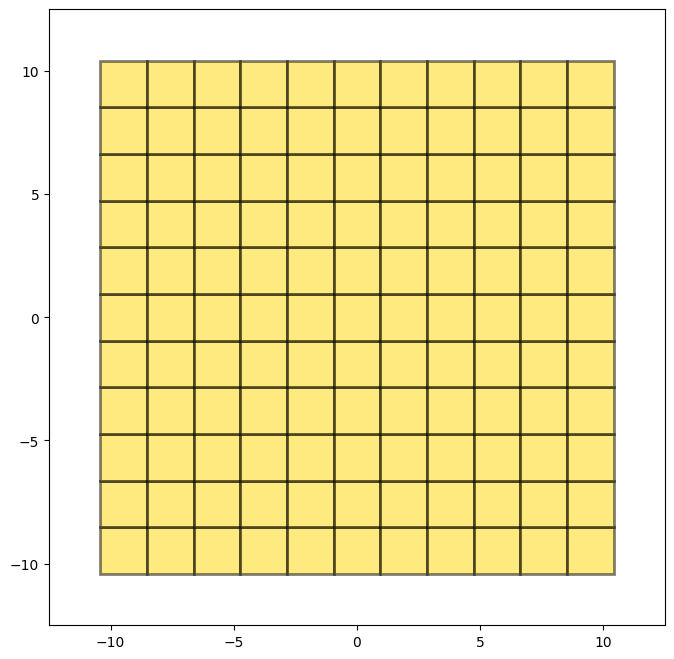

In [80]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_grid_figure(PIXEL_PITCH=1.894, GRID_SIZE=11):
    # Create a figure and an axes
    fig, ax = plt.subplots(figsize=(8, 8))

    # Calculate the offset to center the grid
    offset = (GRID_SIZE * PIXEL_PITCH) / 2

    # Add squares to the axes
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            x = (i * PIXEL_PITCH) - offset
            y = (j * PIXEL_PITCH) - offset
            square = patches.Rectangle(
                (x, y),
                PIXEL_PITCH,
                PIXEL_PITCH,
                edgecolor="black",
                facecolor="gold",
                alpha=0.5,
                linewidth=2,  # Increase the edge thickness
            )
            ax.add_patch(square)

    # Set the aspect of the plot to be equal
    ax.set_aspect("equal")

    # Set limits
    xy_limits = offset * 1.2
    ax.set_xlim(-xy_limits, xy_limits)
    ax.set_ylim(-xy_limits, xy_limits)
    
    return fig, ax

draw_grid_figure()


In [81]:
def projection(h, H, POINT_SOURCE, MASK_POSITION):
    PIXEL_PITCH = 1.894  # mm
    HOLE_DIAMETER = 0.75  # mm
    hole_positions, x_mesh, y_mesh = mask_hole_positions(3*PIXEL_PITCH, MASK_POSITION[0], MASK_POSITION[1])

    x_distances = x_mesh - POINT_SOURCE[0]
    y_distances = y_mesh - POINT_SOURCE[1]
    x_shifts = x_distances * h / H
    y_shifts = y_distances * h / H

    x_projected = x_mesh + x_shifts
    y_projected = y_mesh + y_shifts

    diameters = np.ones_like(x_mesh) * HOLE_DIAMETER * (1 + h / H)

    # diagonals = np.linalg.norm(hole_positions - POINT_SOURCE, axis=-1)
    # diagonal_shifts = diagonals * h / H
    return x_projected, y_projected, diameters

x_projected, y_projected, diameters = projection(h=20, H=100, POINT_SOURCE=(0, 0), MASK_POSITION = (2, 1))
print(x_projected)
print(y_projected)

[[-7.8276 -1.0092  5.8092 12.6276]
 [-7.8276 -1.0092  5.8092 12.6276]
 [-7.8276 -1.0092  5.8092 12.6276]
 [-7.8276 -1.0092  5.8092 12.6276]]
[[11.4276 11.4276 11.4276 11.4276]
 [ 4.6092  4.6092  4.6092  4.6092]
 [-2.2092 -2.2092 -2.2092 -2.2092]
 [-9.0276 -9.0276 -9.0276 -9.0276]]


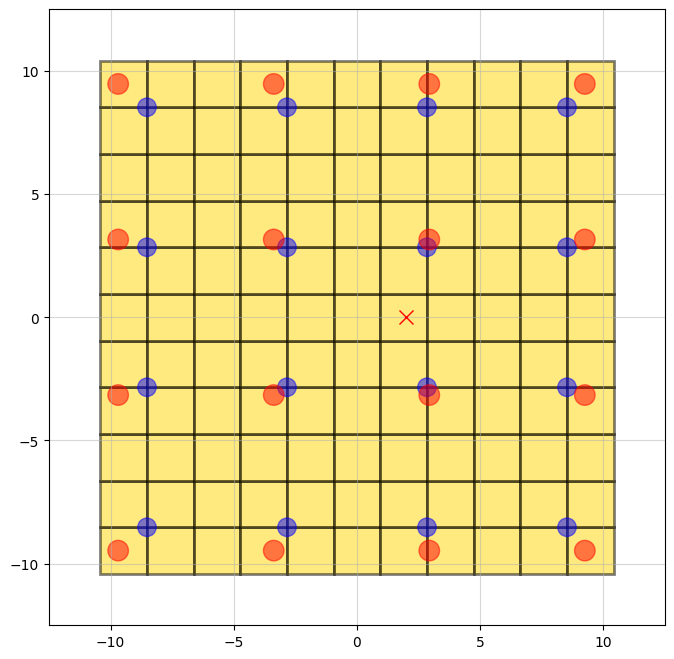

In [82]:
PIXEL_PITCH = 1.894
HOLE_DIAMETER = 0.75
H = 180
h = 20
POINT_SOURCE = (2, 0)
x_mask, y_mask = 0, 0
MASK_POSITION = (x_mask*PIXEL_PITCH, y_mask*PIXEL_PITCH)

hole_positions, x_mesh, y_mesh = mask_hole_positions(3*PIXEL_PITCH, MASK_POSITION[0], MASK_POSITION[1])
x_projected, y_projected, diameters = projection(h, H, POINT_SOURCE, MASK_POSITION)

#------------------------------------------------------------

fig, ax = draw_grid_figure(PIXEL_PITCH=1.894, GRID_SIZE=11)

ax.plot([POINT_SOURCE[0]], [POINT_SOURCE[1]], color="red", marker="x", markersize=10)

for x_mesh_i, y_mesh_i in zip(x_mesh.flatten(), y_mesh.flatten()):
    circle = plt.Circle((x_mesh_i, y_mesh_i), 
                        HOLE_DIAMETER / 2, 
                        color="blue", fill=True, alpha=0.5)
    plt.gca().add_artist(circle)

for x_projected_i, y_projected_i, di in zip(x_projected.flatten(), y_projected.flatten(), diameters.flatten()):
    circle = plt.Circle((x_projected_i, y_projected_i), 
                        di / 2, 
                        color="red", fill=True, alpha=0.5)
    plt.gca().add_artist(circle)

plt.grid(alpha=0.5)
